# Научно-исследовательская работа студента по курсу "Технологии машинного обучения"

## Соловьева Александра ИУ5Ц-83Б

### Введение

В качестве предметной области был выбран набор данных, содержащий данные о ценах на жилье, проданных за некоторый период на территории США.

Задача данной работы - предсказание цены жилья на основе нескольких факторов. Данная задача может быть актуальна для строительной девелоперской компании, планирующей свой выход на рынок недвижимости США, открыв там свое производственное предприятие и производя жилье локально, чтобы составить конкуренцию своим американским и европейским аналогам.

Решение этой задачи может быть использовано руководством строительной девелоперской компании для понимания того, как именно цены изменяются в зависимости от характеристик жилья. С использованием этих данных, оно сможет более оптимально разрабатывать новые модели своих домов, чтобы соответствовать определенным ценовым сегментам. Кроме того, построенная модель регрессии может стать хорошим способом для понимания динамики ценообразования на новом рынке.

 

## Основная часть

### Постановка задачи

Необходимо решить задачу регрессии по прогнозированию цен на жилье с использованием материалов дисциплины «Технологии машинного обучения».

### Выбор набора данных для построения моделей машинного обучения

Данный набор доступен по адресу: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

Набор данных имеет следующие атрибуты:

* price - цена дома
* area - площадь дома
* bedrooms - количество спален в доме
* bathrooms - ванные комнаты
* stories - кладовые
* mainroad - главная дорога
* guestroom - комната для гостей
* basement - подвал
* hotwaterheating - подогрев горячей воды
* airconditioning - кондиционер
* parking - парковка
* prefarea - расположении в престижном пригороде
* furnishingstatus - состояние мебели



## Импорт библиотек

С помощью команды import импортируем необходимые начальные библиотеки:

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка данных

Загрузим данные:

In [2]:
data = pd.read_csv('Housing.csv')

## Разведочный анализ данных

### Основные характеристики датасета

Первые 5 строк датасета:

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Размер датасета:

In [4]:
data.shape

(545, 13)

Столбцы:

In [5]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

Типы данных:

In [6]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

### Обработка данных с неинформативными признаками
В датасете присутствуют данные, которые не несут полезной информации для дальнейшего анализа.

Аналитически посчитаем неинформативные признаки (у которых более 90% строк имеют одинаковое значение):

In [7]:
num_rows = len(data.index)
low_information_cols = [] #

for col in data.columns:
    cnts = data[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.90:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

hotwaterheating: 95.41284%
no     520
yes     25
Name: hotwaterheating, dtype: int64



Столбец hotwaterheating неинформативен. Удалим их из датасета.

In [8]:
data.drop(['hotwaterheating'], inplace=True, axis=1)

Проверим корректность удаления:

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   airconditioning   545 non-null    object
 9   parking           545 non-null    int64 
 10  prefarea          545 non-null    object
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


### Обработка пропусков

Определим столбцы с пропусками данных:

In [10]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Видим, что в наборе данных отсутствуют пропуски.

## Структура данных
Построим множество графиков, отображающих структуру данных:

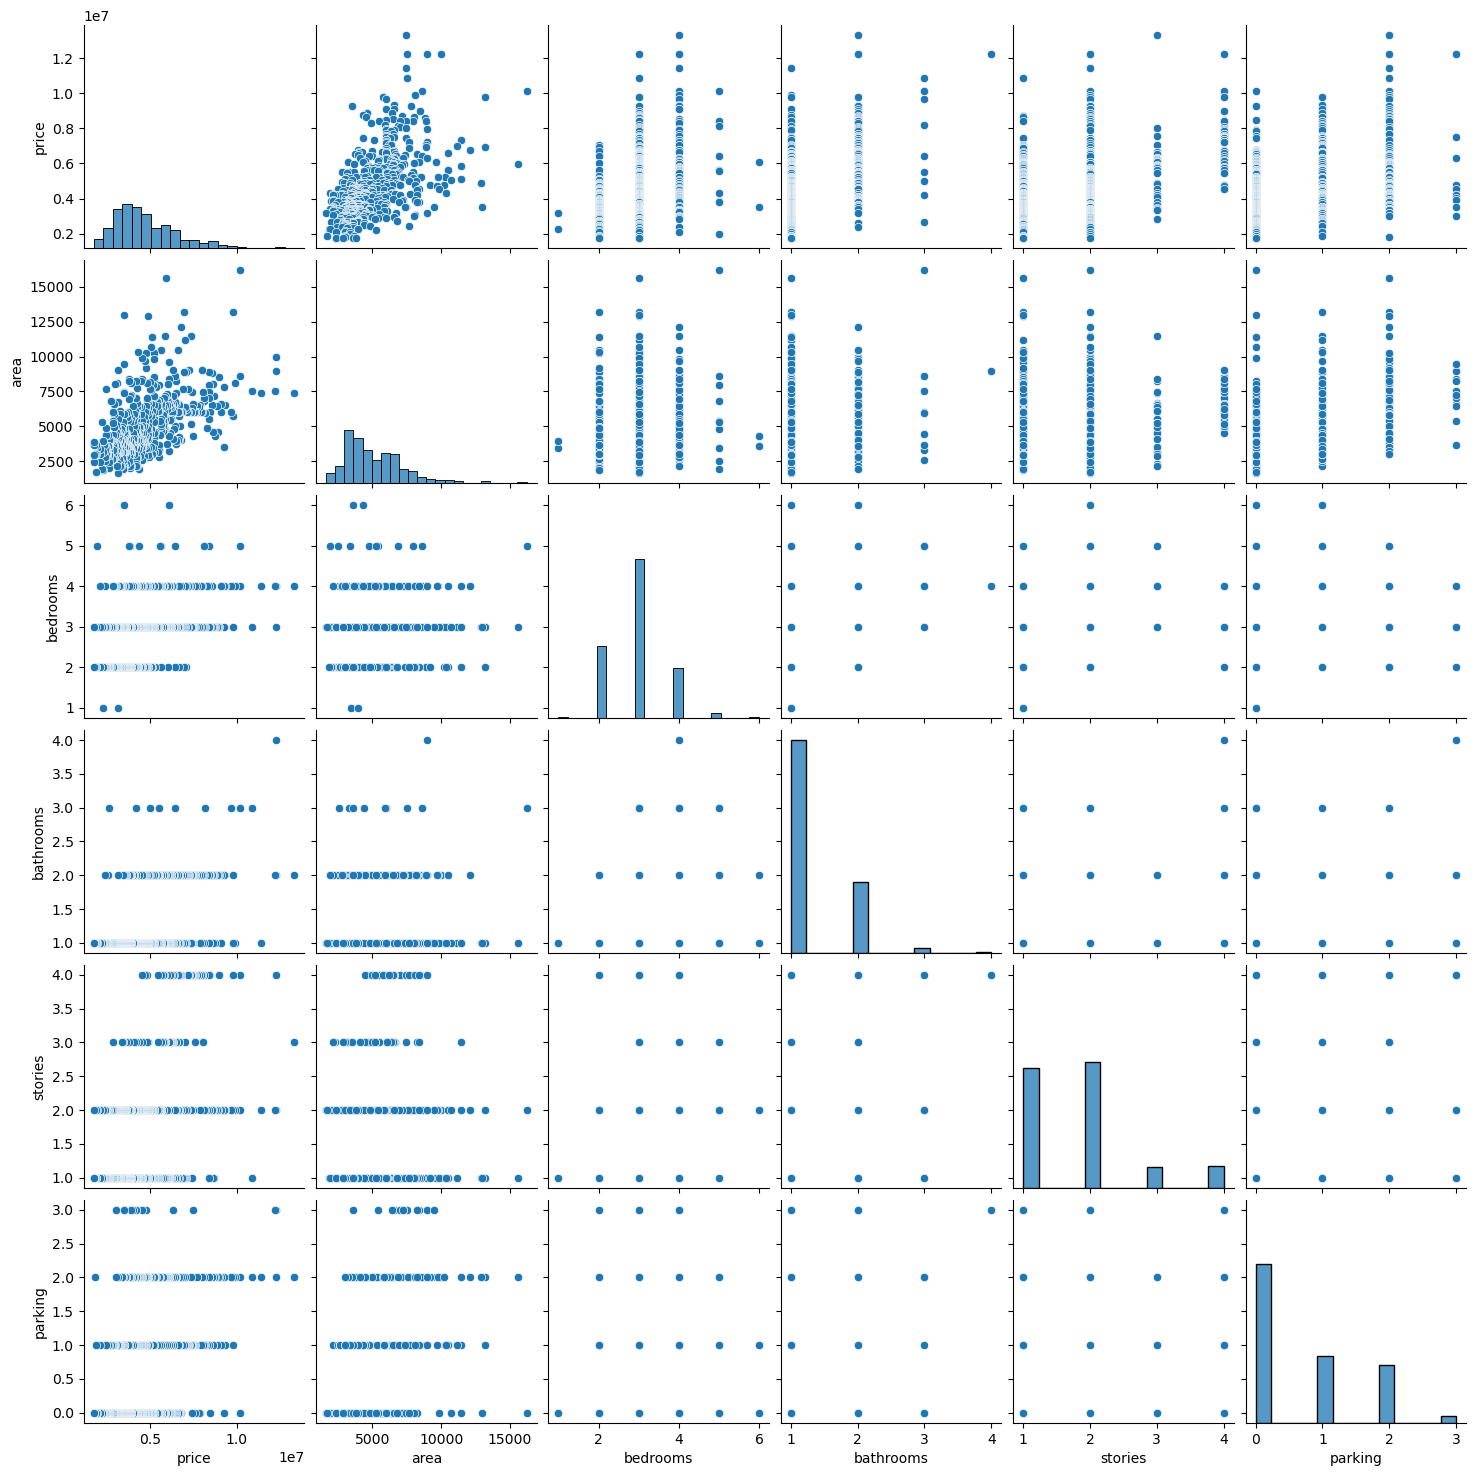

In [11]:
# Парные диаграммы
sns.pairplot(data)

Построим гррафики относительно целевого признака price.

Построим графики распределения цен:

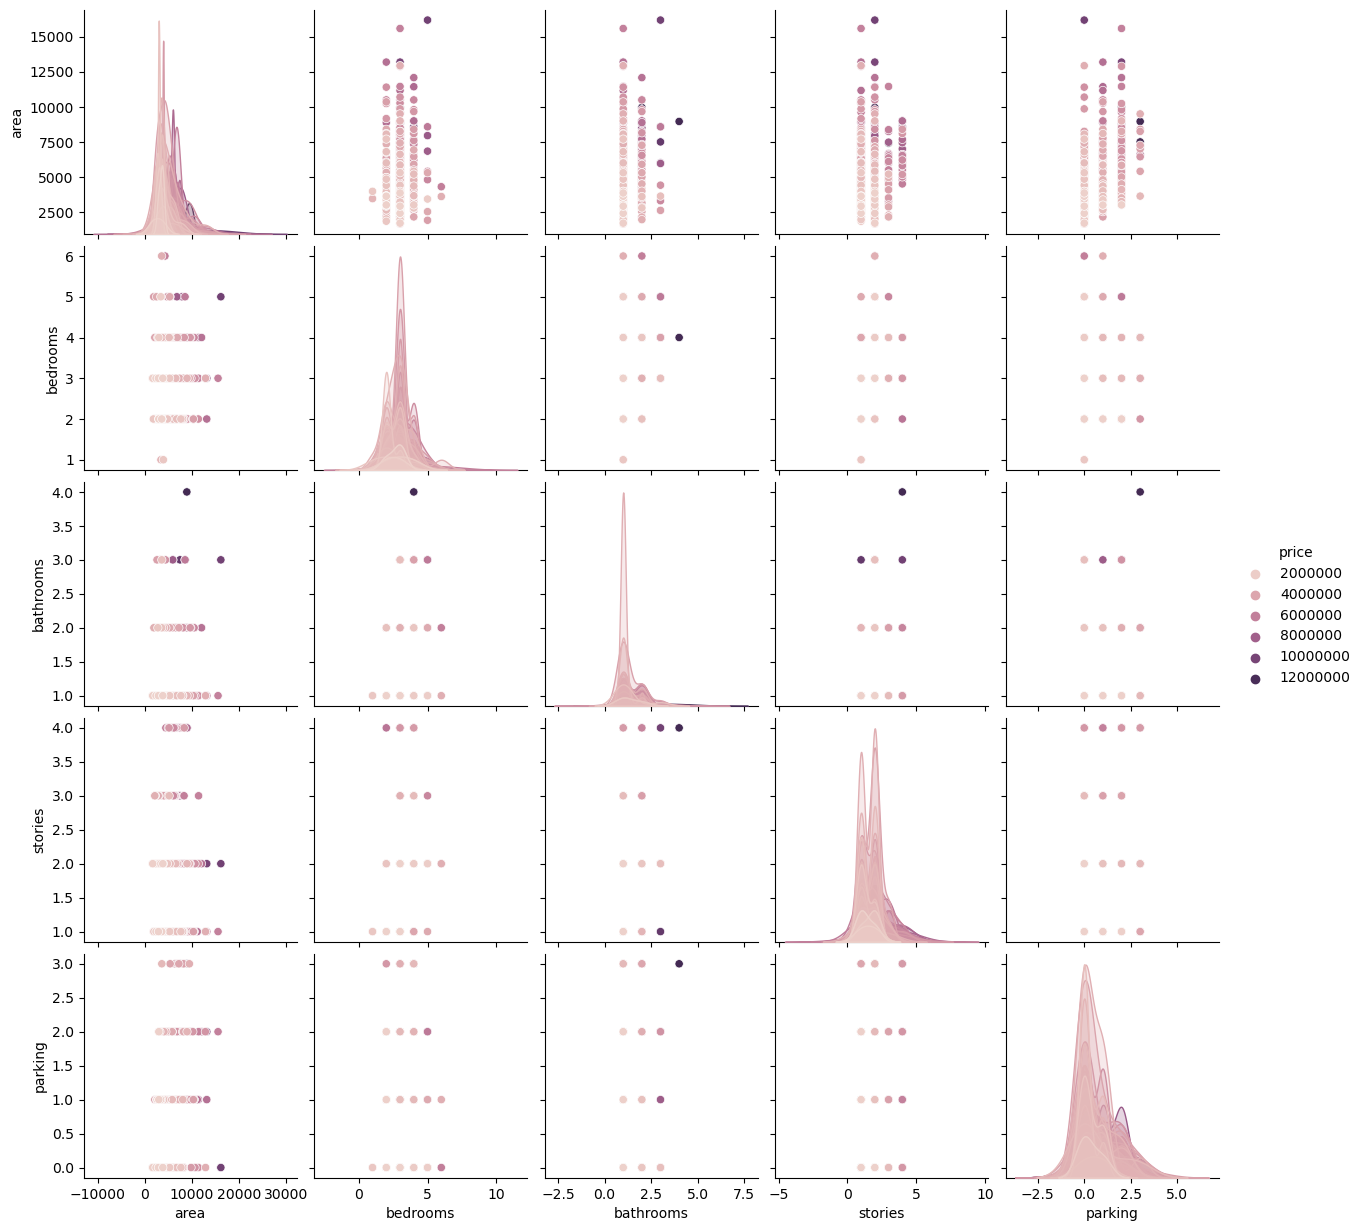

In [12]:
sns.pairplot(data, hue="price")

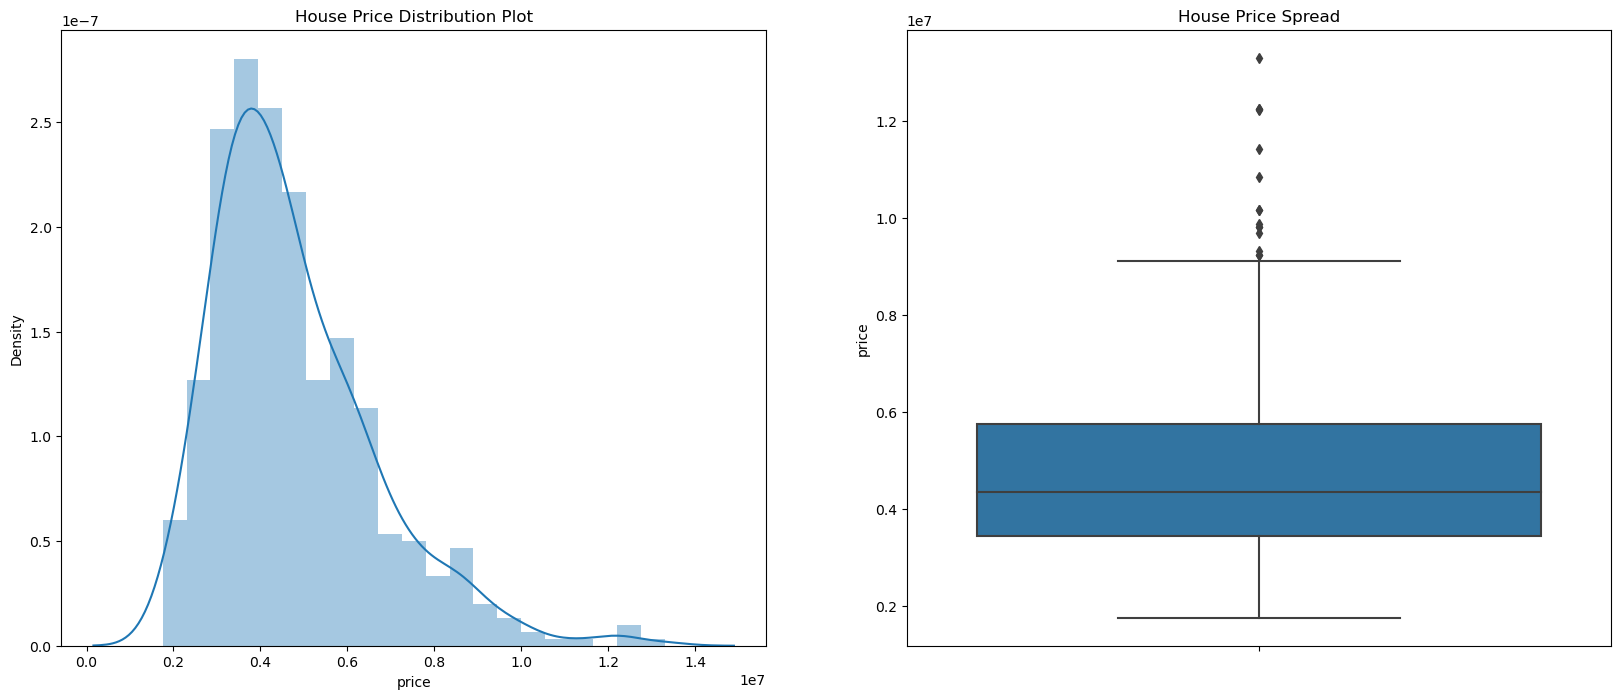

In [13]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.distplot(data.price)

plt.subplot(1,2,2)
plt.title('House Price Spread')
sns.boxplot(y=data.price)

plt.show()

In [14]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

Возьмем числовые колонки: price, area, bedrooms, bathrooms, stories

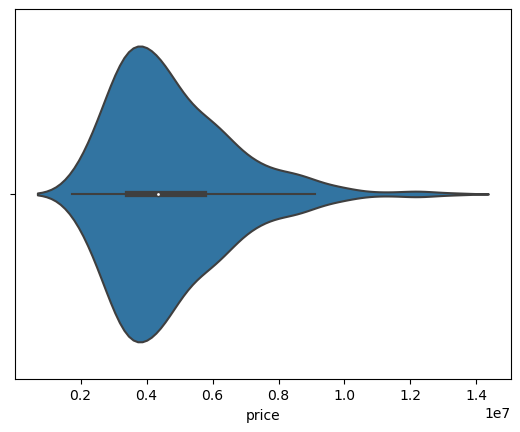

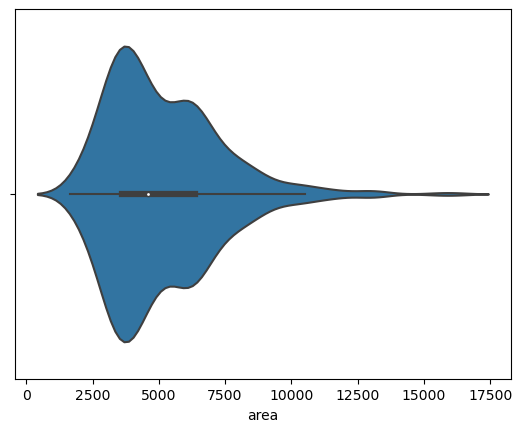

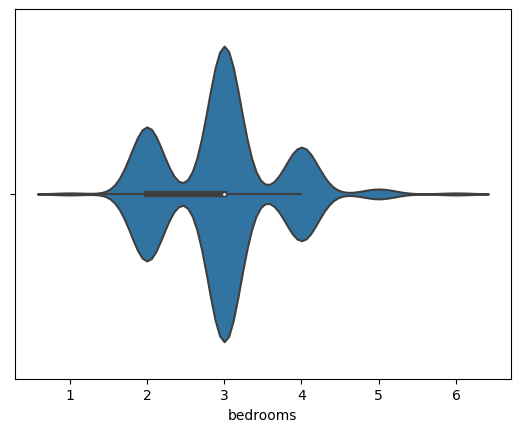

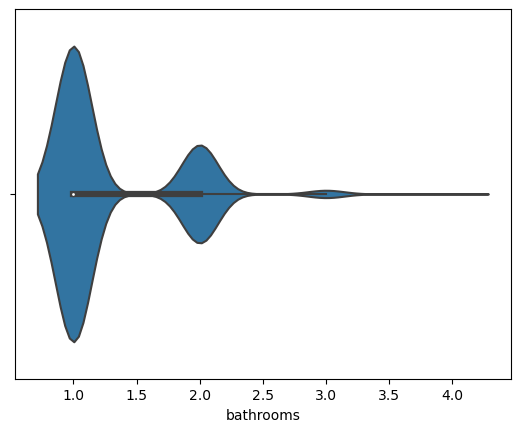

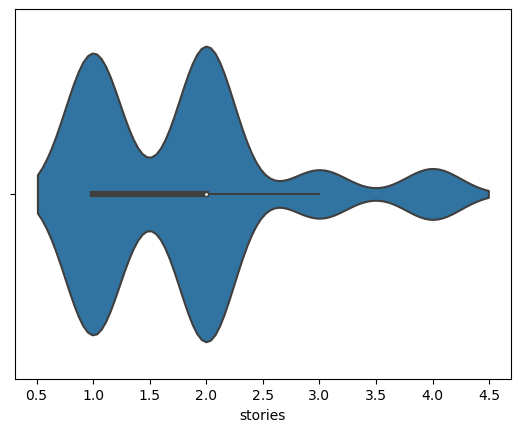

In [15]:
# Скрипичные диаграммы для числовых колонок
for col in ['price', 'area', 'bedrooms', 'bathrooms', 'stories']:
    sns.violinplot(x=data[col])
    plt.show()

## Кодирование категориальных признаков и масштабирование данных
Определим типы данных в наборе:

In [16]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

### Кодирование категориальных признаков
Для коректной работы модели необходимо закодировать категориальнын признаки, к таковым относятся столбцы типа Object.

Используя LabelEncoder из sckit-learn закодируем некоторые столбцы типа Object в числовые значения:

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
letypemanuf = LabelEncoder()
learrmanuf = letypemanuf.fit_transform(data["mainroad"])
data["mainroad"] = learrmanuf
data = data.astype({"mainroad":"int64"})

In [19]:
letypemodel = LabelEncoder()
learrmodel = letypemodel.fit_transform(data["guestroom"])
data["guestroom"] = learrmodel
data = data.astype({"guestroom":"int64"})

In [20]:
letypeasp = LabelEncoder()
learrasp = letypeasp.fit_transform(data["basement"])
data["basement"] = learrasp
data = data.astype({"basement":"int64"})

In [21]:
letypedrive = LabelEncoder()
learrdrive = letypedrive.fit_transform(data["airconditioning"])
data["airconditioning"] = learrdrive
data = data.astype({"airconditioning":"int64"})

In [22]:
letypetype = LabelEncoder()
learrtype = letypetype.fit_transform(data["prefarea"])
data["prefarea"] = learrtype
data = data.astype({"prefarea":"int64"})

In [23]:
letypefs = LabelEncoder()
learrfs = letypefs.fit_transform(data["furnishingstatus"])
data["furnishingstatus"] = learrfs
data = data.astype({"furnishingstatus":"int64"})

In [24]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,1,2,0,0


### Масштабирование данных
Проведем масштабирование данных MinMax с помощью средств из sckit-learn:

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()
scaler_data = scaler.fit_transform(data[data.columns])

Сохраним мастабированные данные:

In [27]:
data_scaled = pd.DataFrame()

In [28]:
for i in range(len(data.columns)):
    col = data.columns[i]
    new_col_name = col + '_scaled'
    data_scaled[new_col_name] = scaler_data[:,i]

In [29]:
data_scaled.head()

,price_scaled,area_scaled,bedrooms_scaled,bathrooms_scaled,stories_scaled,mainroad_scaled,guestroom_scaled,basement_scaled,airconditioning_scaled,parking_scaled,prefarea_scaled,furnishingstatus_scaled
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,1.0,0.666667,1.0,0.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,1.0,1.000000,0.0,0.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.666667,1.0,0.5
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,1.0,1.000000,1.0,0.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,1.0,0.666667,0.0,0.0


Масштабирование данных не повлияло на распределение данных:

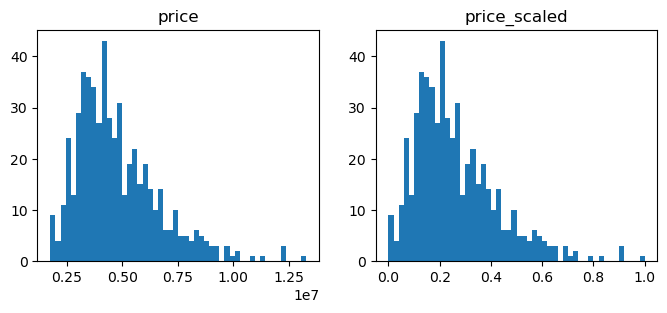

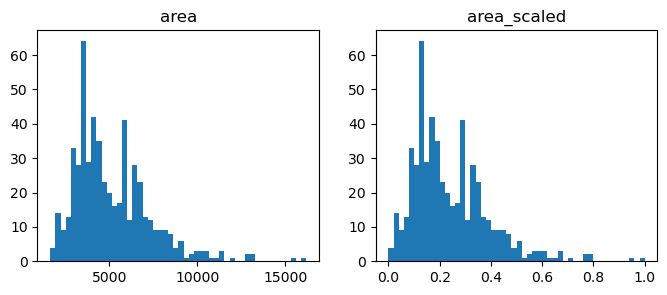

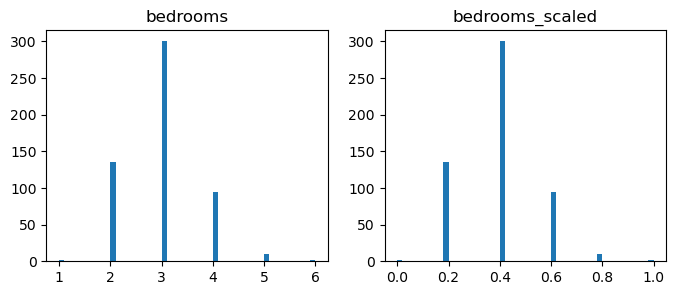

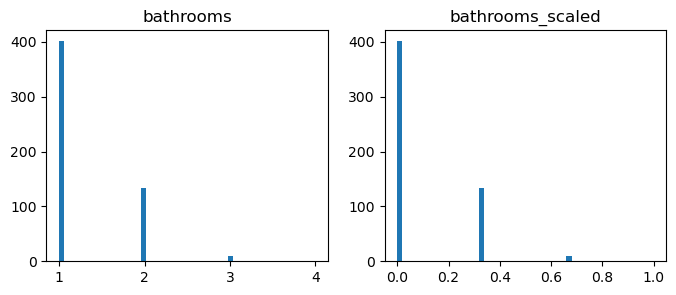

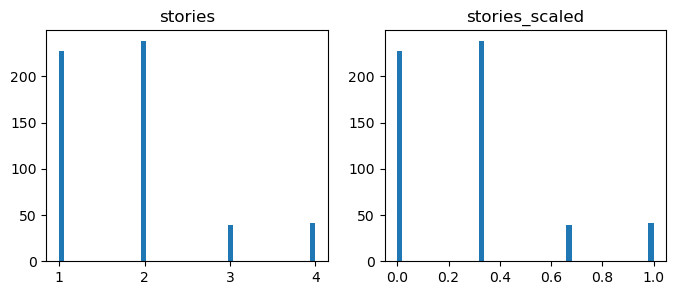

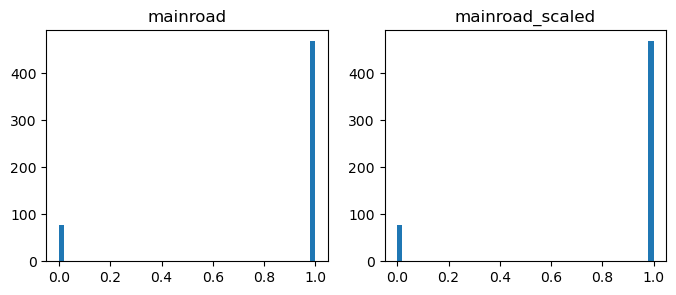

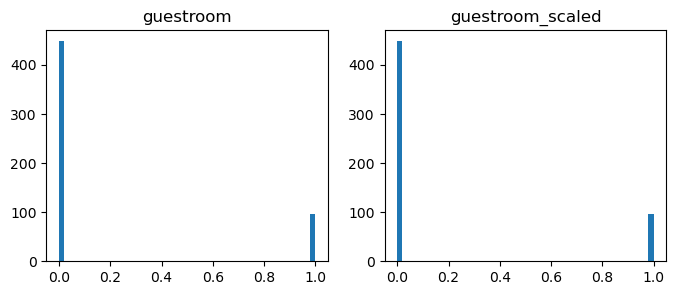

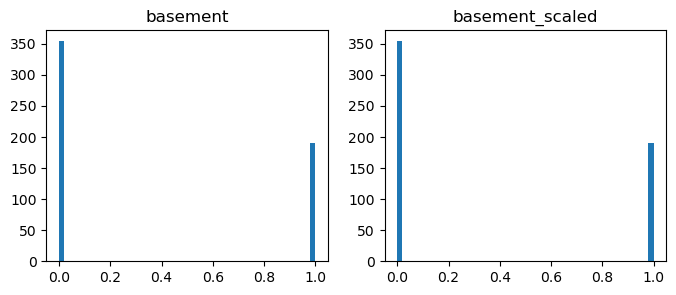

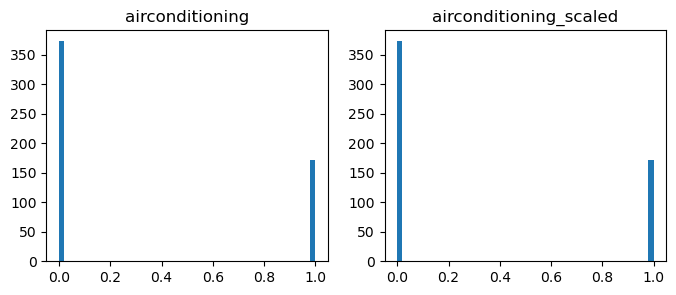

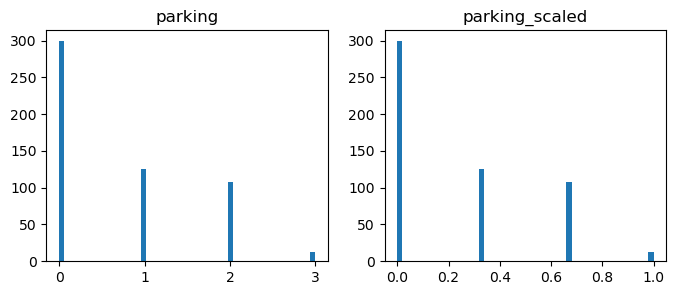

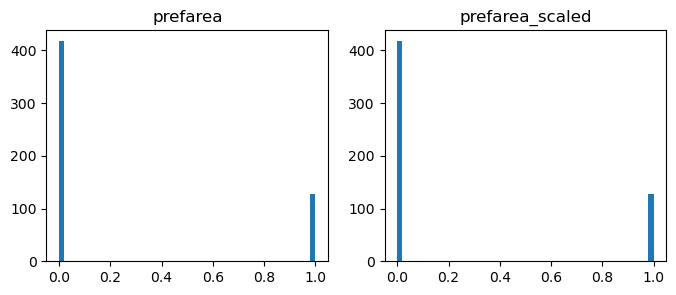

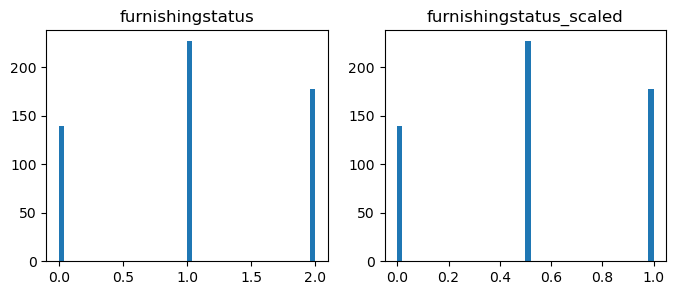

In [30]:
for col in data.columns:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data_scaled[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

## Корреляционный анализ данных
Построим корреляционные матрицы:

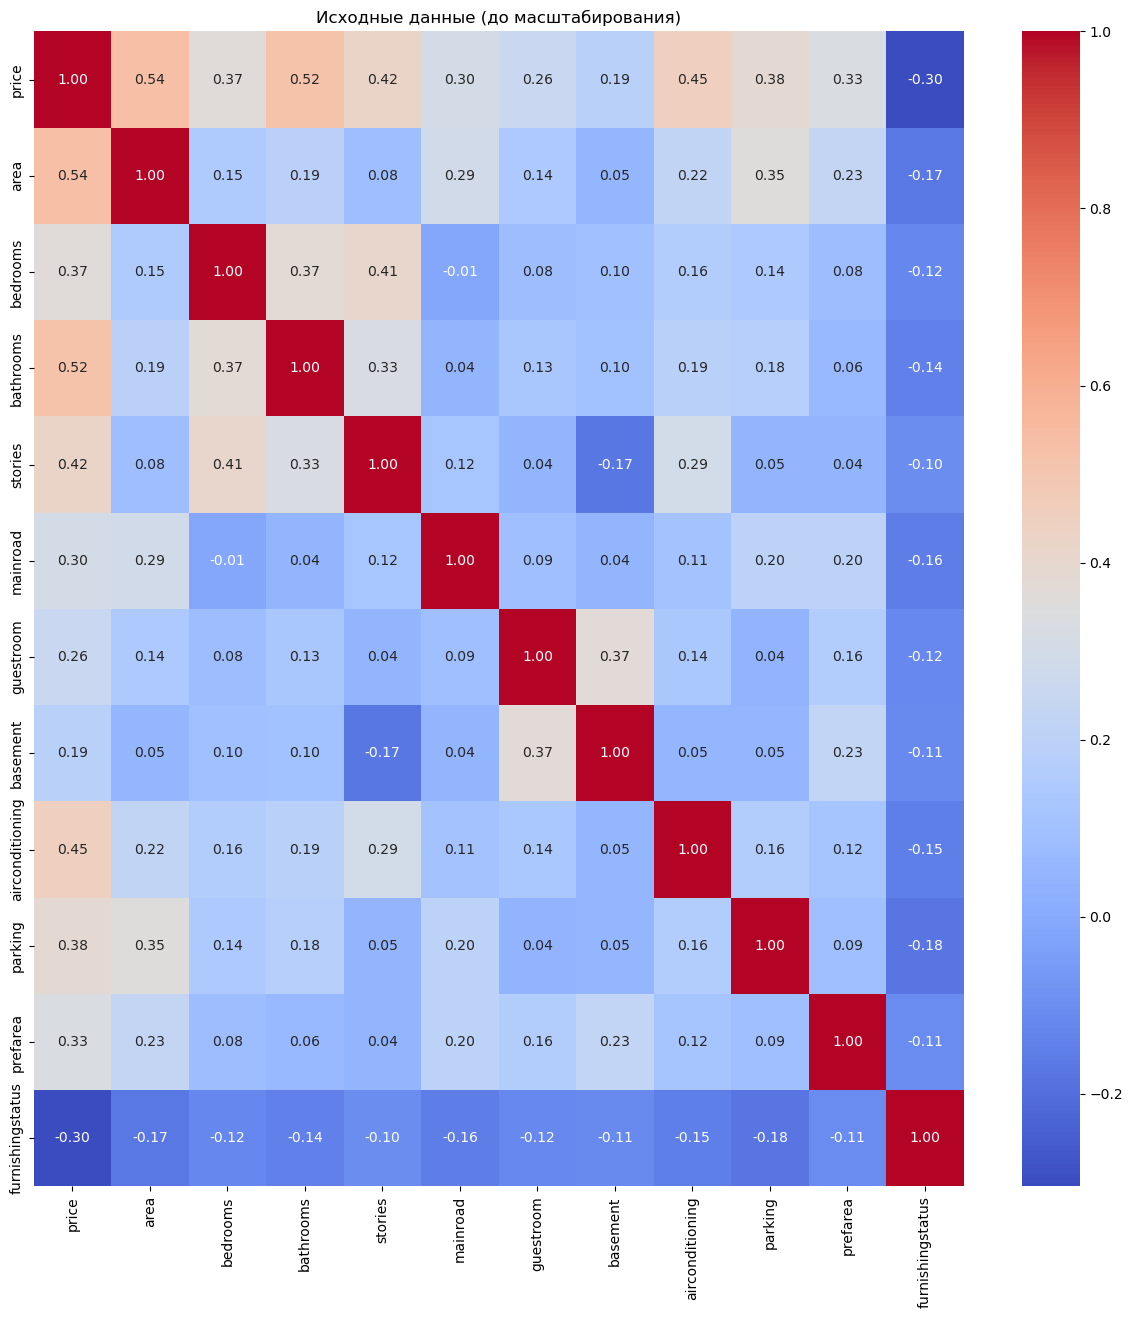

In [31]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data[data.columns].corr(), annot=True, fmt='.2f', cmap="coolwarm")
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

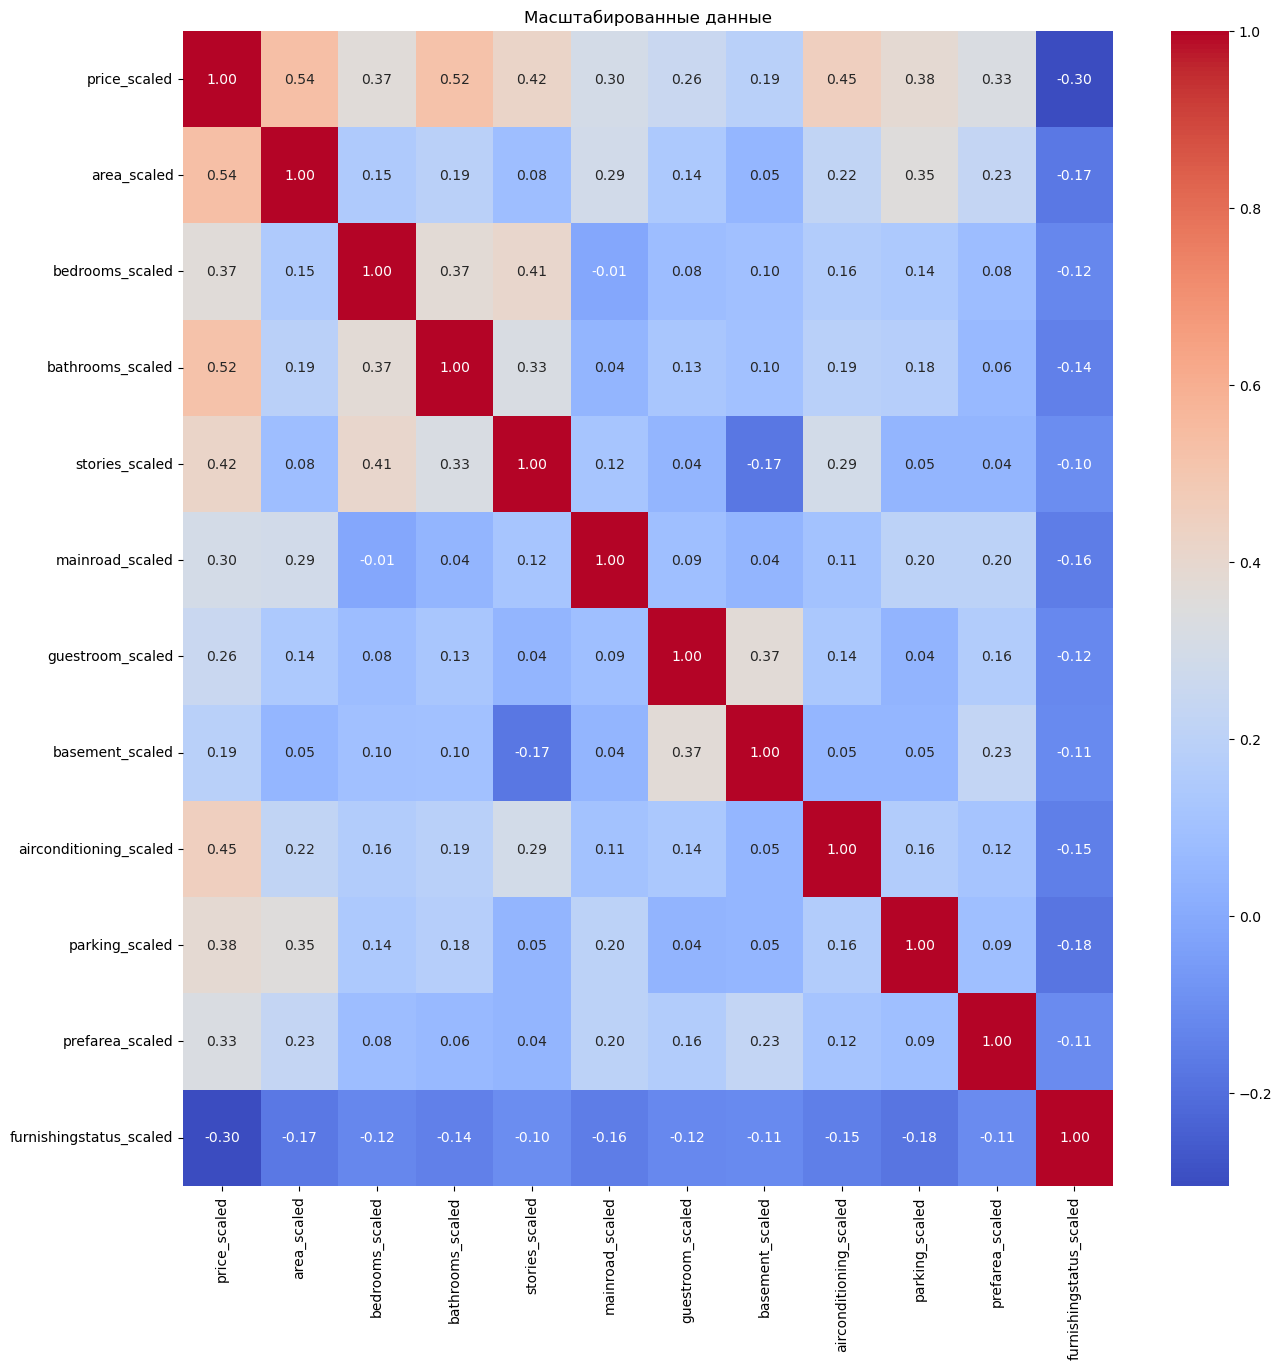

In [32]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data_scaled[data_scaled.columns].corr(), annot=True, fmt='.2f', cmap="coolwarm")
ax.set_title('Масштабированные данные')
plt.show()

На основании корреляционных матрицы можно сделать следующие выводы:
* Корреляционные матрицы для исходных и масштабированных данных совпадают.
* Целевой признак регрессии "price" наиболее сильно коррелирует с "area" (0.54), "bathrooms" (0.52), "airconditioning" (0.45), "stories" (0.42), "parking" (0.38). Эти признаки обязательно следует оставить в модели регрессии.
* Данные позволяют построить модель машинного обучения

In [34]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,1,2,0,0


Построим графики зависимостей признаков с сильной корреляцией:

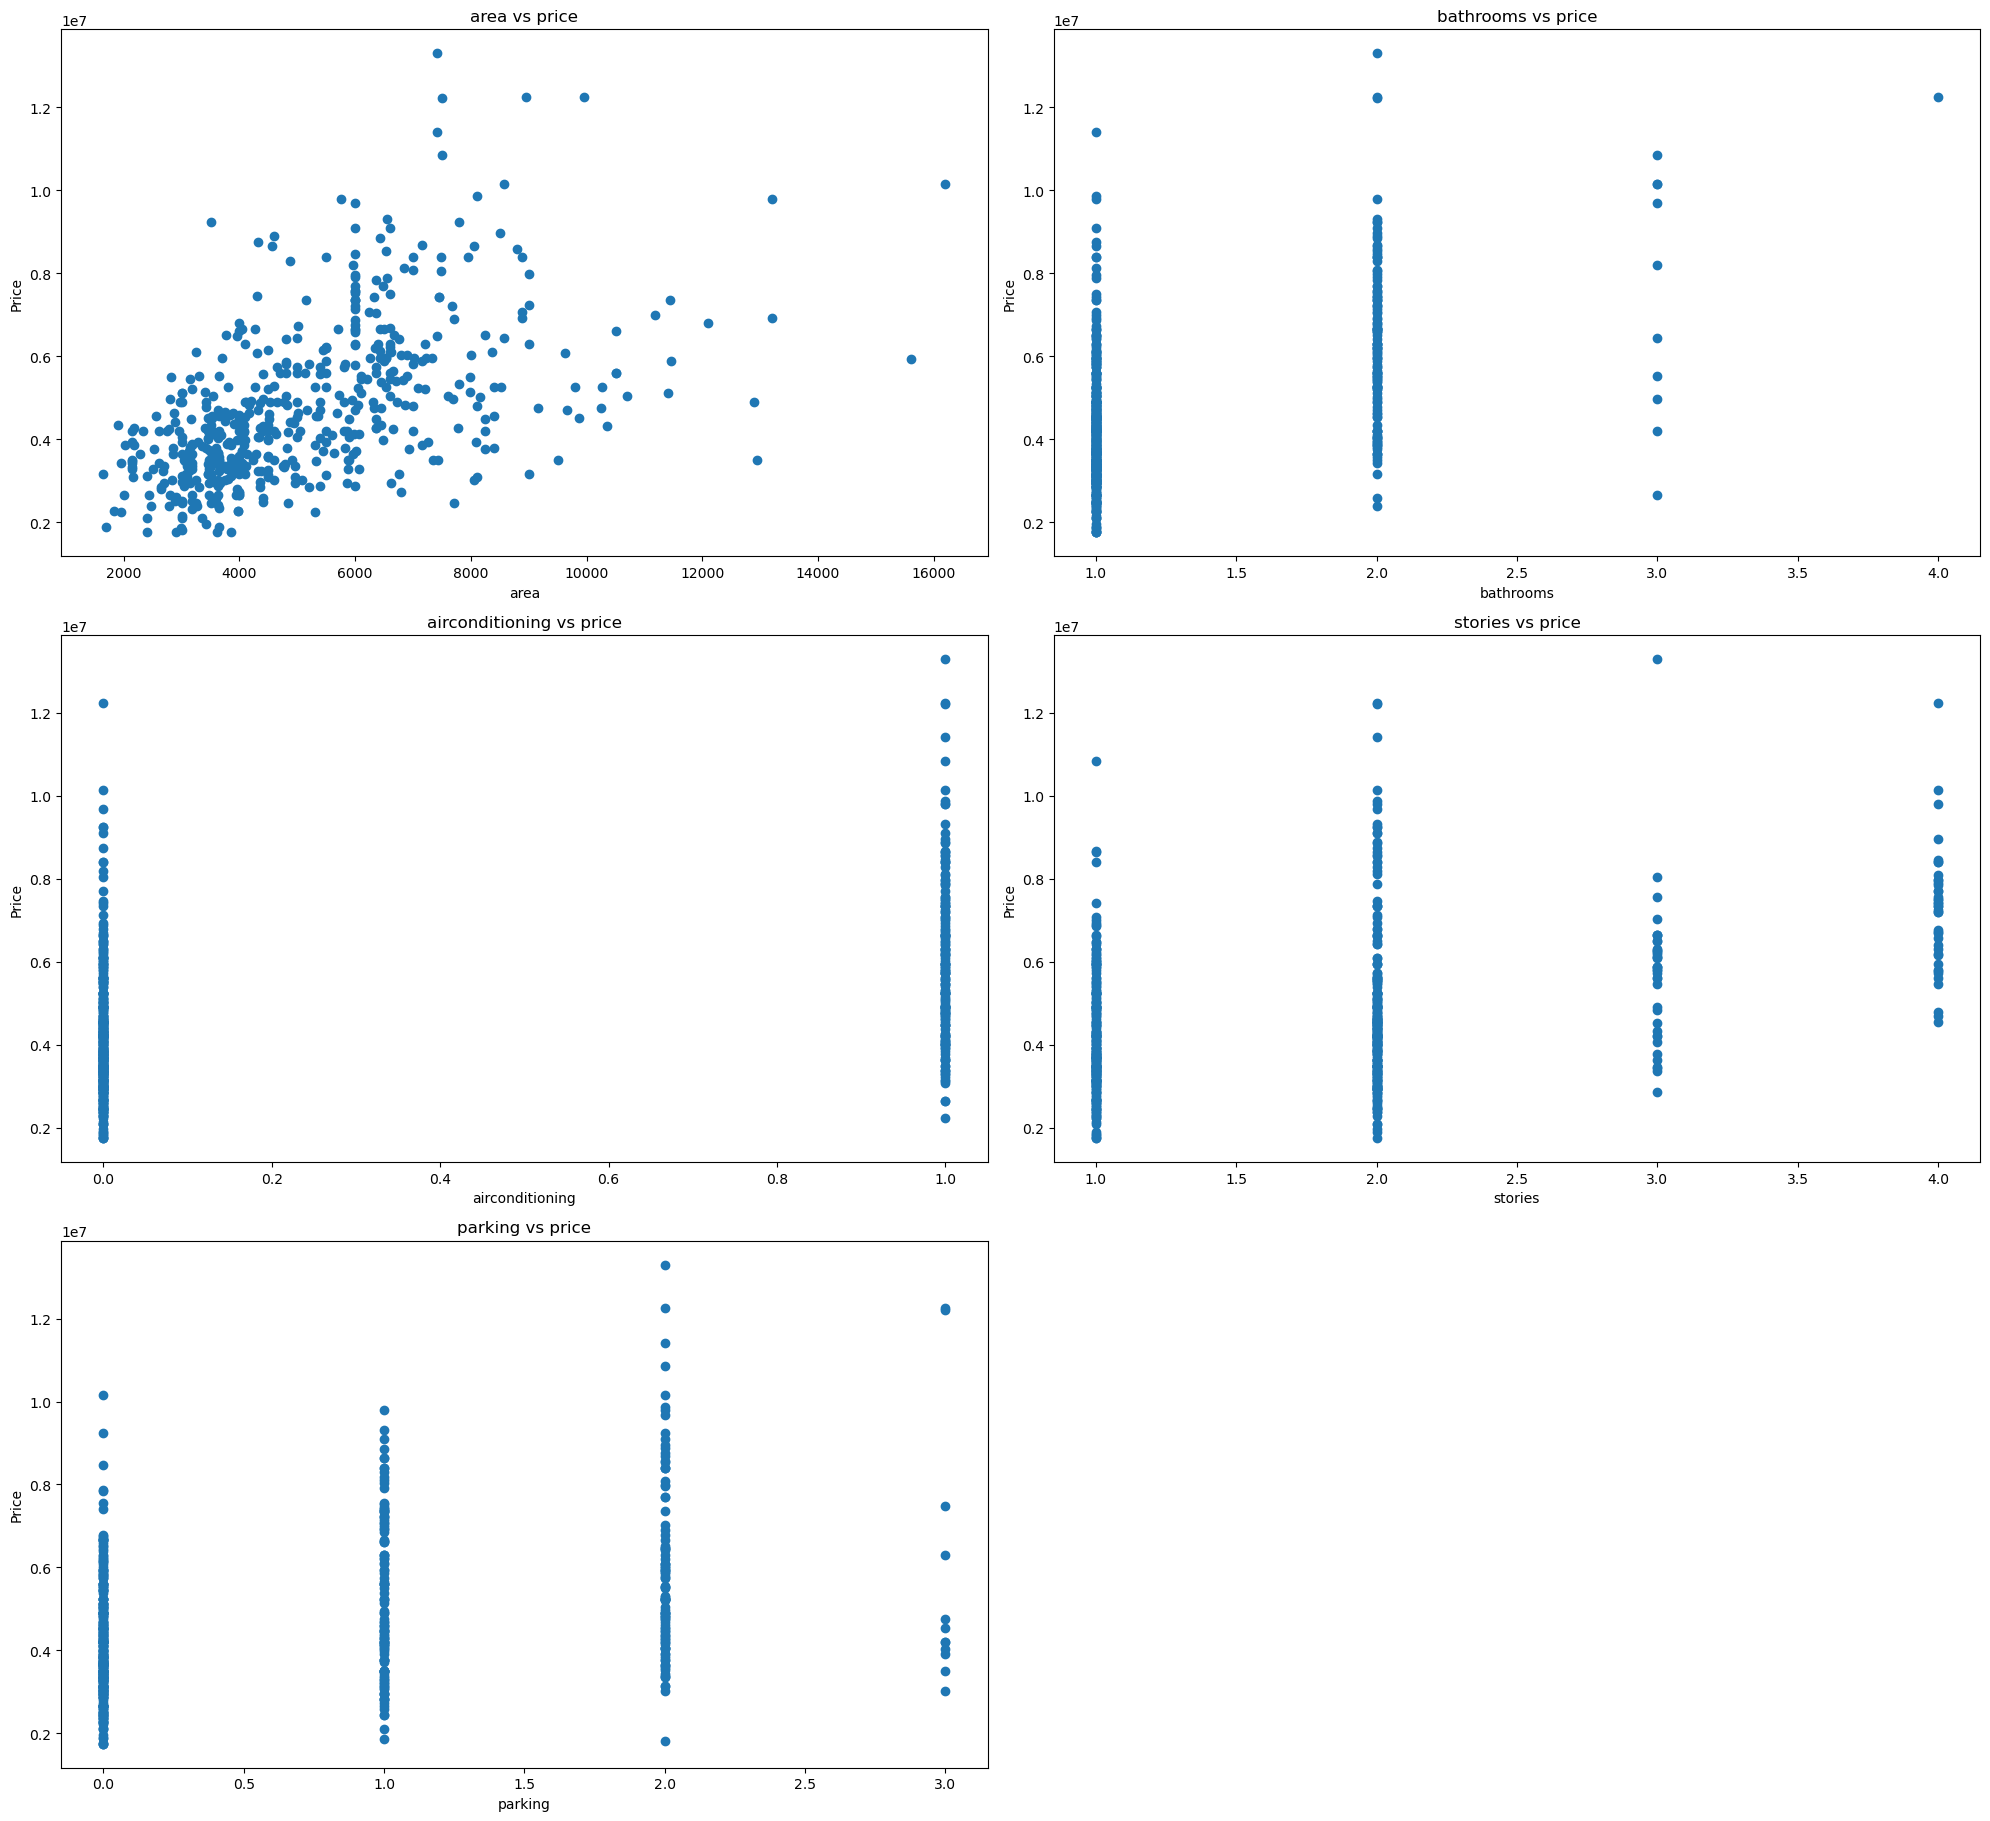

In [35]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(data[x],data['price'])
    plt.title(x+' vs price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(20,30))

scatter('area', 1)
scatter('bathrooms', 2)
scatter('airconditioning', 3)
scatter('stories', 4)
scatter('parking', 5)

plt.tight_layout()

## Выбор подходящих моделей для решения задачи регрессии
Для решения задачи регрессии будем использовать следующие модели:
* Линейная регрессия
* Модель ближайщих соседей
* Модель опорных векторов
* Дерево решений
* Случайный лес
* Градиентный бустинг

## Выбор метрик для оценки качества моделей
В качестве метрик для решения задачи регрессии будем использовать метрики:
* Mean absolute error (средняя абсолютная ошибка)
* Mean squared error (средняя квадратичная ошибка)
* R2-score (коэффициент детерминации)

Они помогут определить качество моделей.

Метрики будем сохранять в класс:

In [36]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()   

## Формирование обучающей и тестовой выборок
Разделим выборку:

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data, data.price, random_state=1)

In [39]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((408, 12), (408,), (137, 12), (137,))

## Построение базового решения (baseline) без подбора гиперпараметров
### Решение задач регрессии
Построим базовые модели:


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
# Модели
regr_models = {'LR': LinearRegression(), 
               'KNN_20':KNeighborsRegressor(n_neighbors=20),
               'SVR':SVR(),
               'Tree':DecisionTreeRegressor(),
               'RF':RandomForestRegressor(),
               'GB':GradientBoostingRegressor()}

Сохраним метрики:

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [43]:
regrMetricLogger = MetricLogger()

In [44]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MSE', model_name, mse)
    regrMetricLogger.add('R2', model_name, r2)    
    
    print('{} \t MAE={}, MSE={}, R2={}'.format(
        model_name, round(mae, 3), round(mse, 3), round(r2, 3)))

Отобразим метрики:

In [45]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

LR 	 MAE=0.0, MSE=0.0, R2=1.0
KNN_20 	 MAE=84149.912, MSE=140599161417.405, R2=0.964
SVR 	 MAE=1448704.848, MSE=4086301748441.568, R2=-0.033
Tree 	 MAE=29593.139, MSE=16970985975.182, R2=0.996
RF 	 MAE=33411.189, MSE=27280769562.413, R2=0.993
GB 	 MAE=30907.923, MSE=16812816109.228, R2=0.996


Чем ближе значение MAE и MSE к 0 и R2 к 1 - тем лучше качество регрессии.

Видно, что по трем метрикам лучшая модель регрессии - у линейной модели. Но также по метрике R2-score модели градиентного бустинга, случайного леса и ближайших соседей близки к линейной.

Худшая модель по всем трем метрикам - модель опорных векторов.

## Подбор оптимальной модели и гиперпараметра
Подбираем оптимальные гиперпараметры:

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
n_range = np.array(range(5,100,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
         90, 95])}]

In [48]:
%%time
regr_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, scoring='neg_mean_absolute_error')
regr_gs.fit(X_train, y_train)

CPU times: total: 328 ms
Wall time: 354 ms


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])}],
             scoring='neg_mean_absolute_error')

Лучшая модель:

In [49]:
regr_gs.best_estimator_

KNeighborsRegressor()

Лучшее значение параметров:

In [50]:
regr_gs.best_params_

{'n_neighbors': 5}

Сохраним значение:

In [51]:
regr_gs_best_params_txt = str(regr_gs.best_params_['n_neighbors'])
regr_gs_best_params_txt

'5'

Изменим качества на тестовой выборке в зависимости от К-соседей:

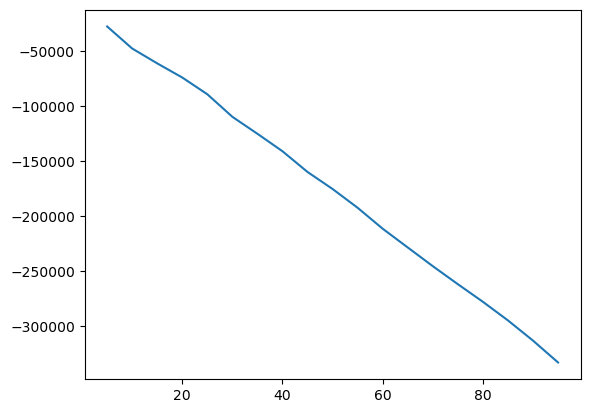

In [52]:
plt.plot(n_range, regr_gs.cv_results_['mean_test_score'])

## Оптимальное значение гиперпараметра. Сравнение качества с baseline
Оптимальная модель -  KNeighborsRegressor. Оптимальное значение гиперпараметра - 5.

Сравним метрики с baseline моделью:

In [53]:
regr_models_grid = {'KNN_20':KNeighborsRegressor(n_neighbors=20), 
                    str('KNN_'+regr_gs_best_params_txt):regr_gs.best_estimator_}

In [54]:
for model_name, model in regr_models_grid.items():
    regr_train_model(model_name, model, regrMetricLogger)

KNN_20 	 MAE=84149.912, MSE=140599161417.405, R2=0.964
KNN_5 	 MAE=34103.591, MSE=33059024660.905, R2=0.992


Видим, что у оптимальной модели лучше качество, чем у исходной baseline-модели.

## Формирование выводов о качестве построенных моделей на основе выбранных метрик
Сравним все метрики.

In [55]:
# Метрики качества модели
regr_metrics = regrMetricLogger.df['metric'].unique()
regr_metrics

array(['MAE', 'MSE', 'R2'], dtype=object)

Метрика Mean Absolute Error:

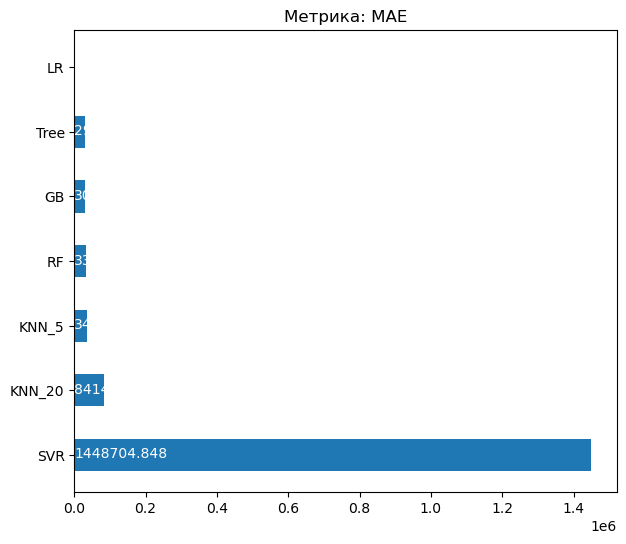

In [56]:
regrMetricLogger.plot('Метрика: ' + 'MAE', 'MAE', ascending=False, figsize=(7, 6))

In [57]:
regrMetricLogger_no_svr = MetricLogger()

In [58]:
regr_models_no_svr = {'LR': LinearRegression(), 
               'KNN_20':KNeighborsRegressor(n_neighbors=20),
               'Tree':DecisionTreeRegressor(),
               'RF':RandomForestRegressor(),
               'GB':GradientBoostingRegressor()}

In [59]:
for model_name, model in regr_models_no_svr.items():
    regr_train_model(model_name, model, regrMetricLogger_no_svr)

LR 	 MAE=0.0, MSE=0.0, R2=1.0
KNN_20 	 MAE=84149.912, MSE=140599161417.405, R2=0.964
Tree 	 MAE=37248.175, MSE=24830124087.591, R2=0.994
RF 	 MAE=33020.482, MSE=26341830791.958, R2=0.993
GB 	 MAE=30876.821, MSE=16812718883.373, R2=0.996


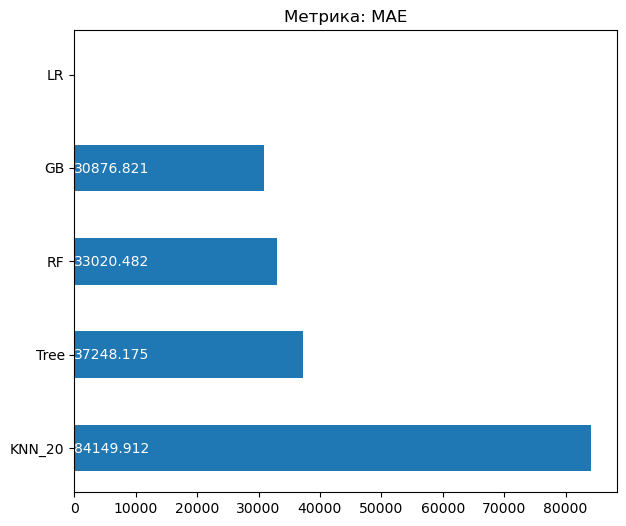

In [60]:
regrMetricLogger_no_svr.plot('Метрика: ' + 'MAE', 'MAE', ascending=False, figsize=(7, 6))

Чем ближе значение метрики к 0, тем качественне модель. Лучший результат показвывает модель линейной регрессии, худший - модель опорных векторов.

Метрика Mean Squarred Error:

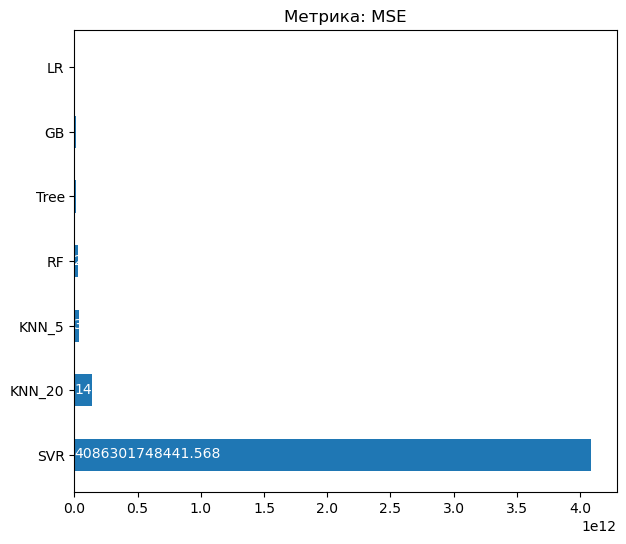

In [61]:
regrMetricLogger.plot('Метрика: ' + 'MSE', 'MSE', ascending=False, figsize=(7, 6))

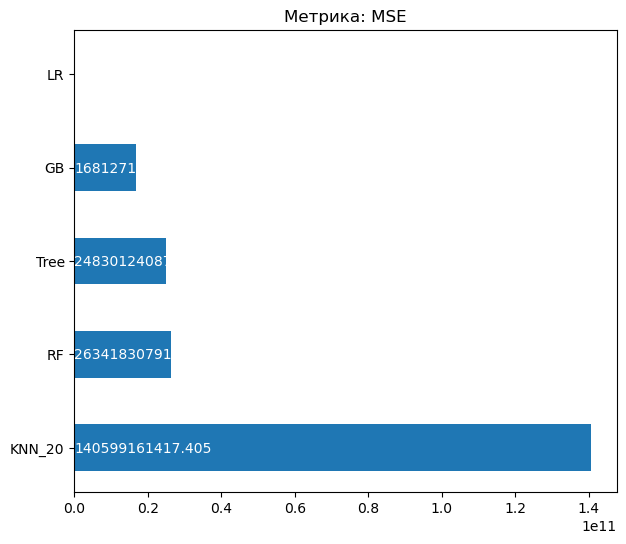

In [62]:
regrMetricLogger_no_svr.plot('Метрика: ' + 'MSE', 'MSE', ascending=False, figsize=(7, 6))

Чем ближе значение метрики к нулю, тем модель более качественна. Модель линейной регрессии выигрывает по качеству у остальных. Модель SVR обладает наихудшем качеством.

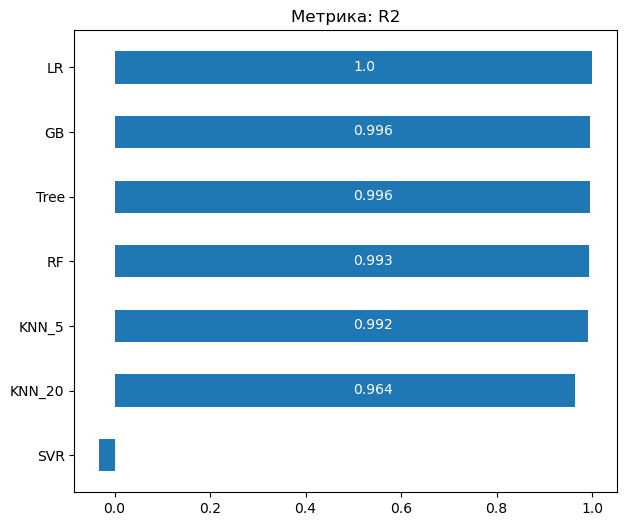

In [63]:
regrMetricLogger.plot('Метрика: ' + 'R2', 'R2', ascending=True, figsize=(7, 6))

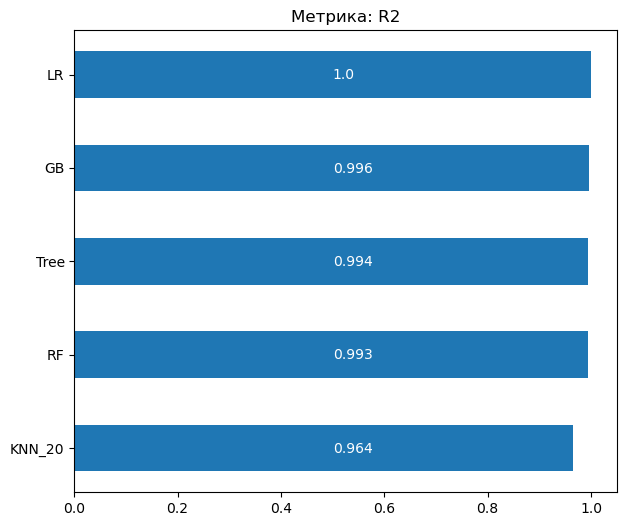

In [64]:
regrMetricLogger_no_svr.plot('Метрика: ' + 'R2', 'R2', ascending=True, figsize=(7, 6))

Исходя из метрики R2-score - наихудший результат показывает модель опорных векторов. Лучшими моделями можно считать модели линейной регрессии, градиентного бустинга, случайного леса и дерева решений.

Итог: наиболее качественной моделью можно считать модель линейной регрессии.

## Заключение
В работе был проведен разведочный анализ данных с обработкой данных с неинформативными признаками, пропусков и модификацией структуры и самих данных. Также было проведено кодирование категориальных признаков, масштабирование данных и сравнение масштабированных данных с исходными. Был выполнен корреляционный анализ и на его основании были выбраны модели для решения задачи регрессии. Исходные данные были разделены на тестовую и обучающую выборку, на основе этих выборок были обучены выбранные модели. Также была построена наиболее оптимальная модель. Все модели подверглись сравнению для определения наилучшего качества решения задачи регрессии, для этого использовались несколько метрик регрессии.